In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

In [5]:
df = pd.read_csv('data/movie_metadata.csv')

<b>Exibição dos dados</b> 

In [6]:
pd.options.display.max_columns = 200
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
df.shape

(5043, 28)

<b>Exibindo informações do dataset</b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

<b>Checando alcances dos valores</b>

In [9]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


<b>Procura por valores faltantes</b>

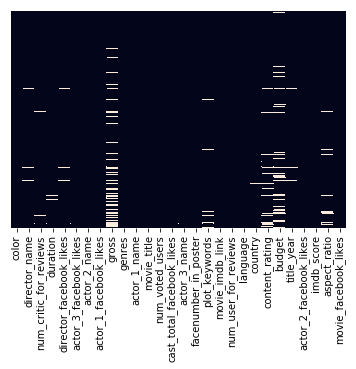

In [10]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [11]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

<b>Substituindo valores numéricos pela média</b>

In [12]:
for column in df.select_dtypes(['float64','int64']).columns:
    df[column] = df[column].fillna(value=np.mean(df[column]))

<b>Observar novamente valores faltantes</b>

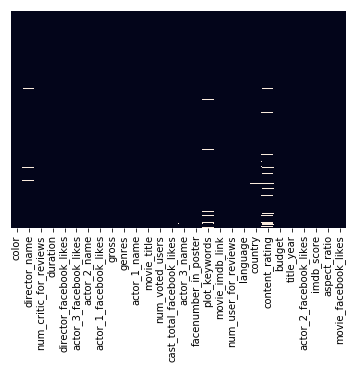

In [13]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

<b>Apagando valores faltantes</b>

In [14]:
dropped_df = df.copy(deep=True)

In [15]:
dropped_df.dropna(inplace=True)

In [16]:
dropped_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4.581000e+03,4.581000e+03,4581.000000,4581.000000,4581.000000,4.581000e+03,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000
mean,150.912319,108.878236,730.958306,685.704868,6959.201484,4.952285e+07,9.111806e+04,10321.748527,1.357638,295.101674,4.161035e+07,2002.007204,1774.251473,6.435735,2.109516,8124.713163
std,121.028605,22.289321,2901.364231,1735.762256,14673.825729,6.482322e+07,1.429668e+05,18014.970856,1.999689,387.779890,2.050473e+08,12.360018,4200.311584,1.098689,0.495823,20077.136119
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.620000e+02,6.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,63.000000,94.000000,9.000000,158.000000,664.000000,8.111360e+06,1.241100e+04,1598.000000,0.000000,83.000000,8.000000e+06,1999.000000,324.000000,5.800000,1.850000,0.000000
50%,121.000000,105.000000,54.000000,394.000000,1000.000000,3.368227e+07,4.096400e+04,3382.000000,1.000000,176.000000,2.400000e+07,2005.000000,631.000000,6.600000,2.350000,187.000000
75%,206.000000,119.000000,213.000000,651.000000,12000.000000,5.636235e+07,1.060980e+05,14762.000000,2.000000,350.000000,4.200000e+07,2010.000000,939.000000,7.200000,2.350000,7000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


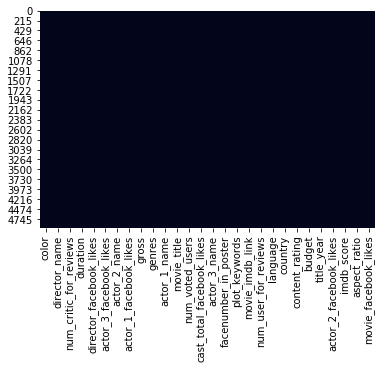

In [17]:
sns.heatmap(dropped_df.isnull(),cbar=False)

<b>Observando dataset reestruturado</b>

In [18]:
dropped_df.shape

(4581, 28)

In [19]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4581 entries, 0 to 5042
Data columns (total 28 columns):
color                        4581 non-null object
director_name                4581 non-null object
num_critic_for_reviews       4581 non-null float64
duration                     4581 non-null float64
director_facebook_likes      4581 non-null float64
actor_3_facebook_likes       4581 non-null float64
actor_2_name                 4581 non-null object
actor_1_facebook_likes       4581 non-null float64
gross                        4581 non-null float64
genres                       4581 non-null object
actor_1_name                 4581 non-null object
movie_title                  4581 non-null object
num_voted_users              4581 non-null int64
cast_total_facebook_likes    4581 non-null int64
actor_3_name                 4581 non-null object
facenumber_in_poster         4581 non-null float64
plot_keywords                4581 non-null object
movie_imdb_link              4581 non-

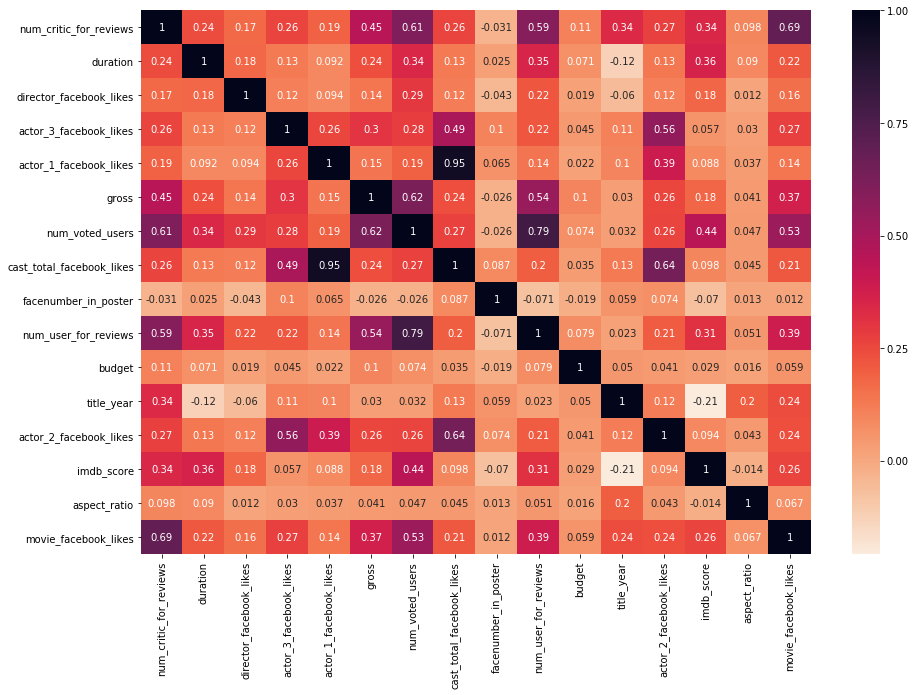

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(dropped_df.corr(),annot=True,cmap=sns.cm.rocket_r)

<b>Eliminando colunas que tem correlação abaixo de 25% com a variavel de interesse</b>


In [21]:
df2 = dropped_df.drop(columns=['aspect_ratio','title_year','facenumber_in_poster','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','cast_total_facebook_likes','actor_2_facebook_likes', 'budget'])

<b>Exibição da nova matriz de correlação e disposição dos dados</b>

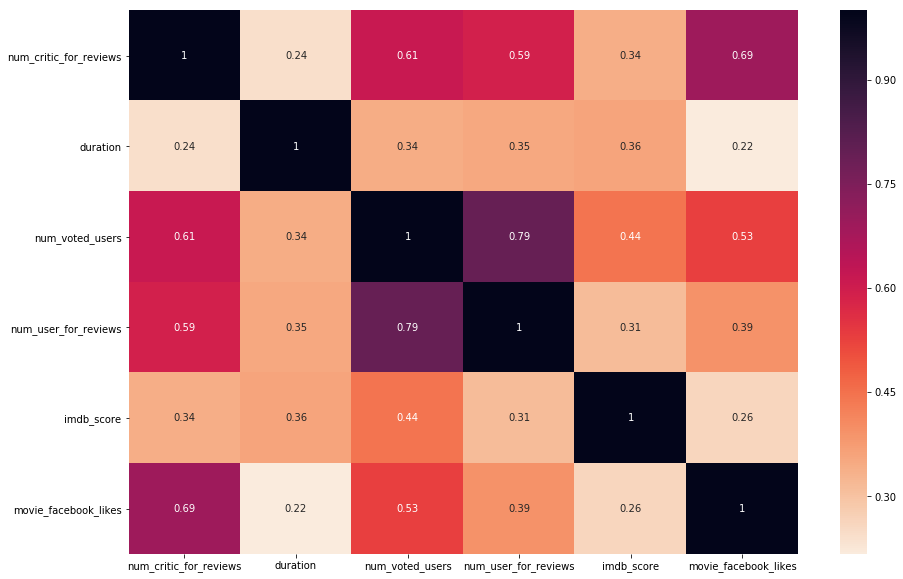

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True,cmap=sns.cm.rocket_r)

In [23]:
df2.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,7.1,0
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,8.5,164000
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,6.6,24000


<b>Verificando diferentes gêneros de filmes.</b>

A corretude pode ser confirmada através da própria [documentação do IMDB](https://help.imdb.com/article/contribution/titles/genres/GZDRMS6R742JRGAG?ref_=helpms_helpart_inline#).

In [24]:
genres_list = dropped_df['genres'].apply(lambda x: x.split('|'))
new_list = []
for x in genres_list:
    for y in x:
        new_list.append(y)
x = np.unique(new_list)
x.astype(object)

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype=object)

**Transformando a coluna categórica `genre` em colunas separadas com valores dummie.**

In [25]:
dummies = pd.DataFrame(pd.Series(df2['genres']).str.get_dummies())
df3 = pd.concat([df2, dummies], axis = 1)
df3.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


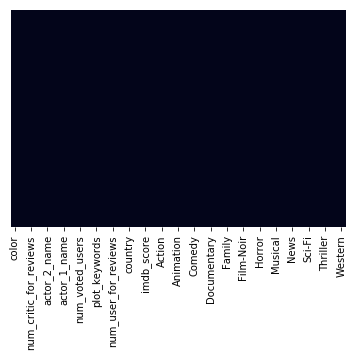

In [26]:
sns.heatmap(df3.isnull(),cbar=False,yticklabels=False)

In [27]:
df3.shape

(4581, 41)

**Transformando a coluna categórica `Color` em uma variável dummie.**

In [28]:
np.unique(df3['color'])

array([' Black and White', 'Color'], dtype=object)

In [29]:
color_dummies = pd.DataFrame(pd.Series(df2['color']).str.get_dummies())
df4 = pd.concat([df3, color_dummies], axis = 1)
df4.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Black and White,Color
0,Color,James Cameron,723.0,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


**Transformando a coluna categórica `content_rating` em uma variável dummie.**

In [30]:
np.unique(df3['content_rating'])

array(['Approved', 'G', 'GP', 'M', 'NC-17', 'Not Rated', 'PG', 'PG-13',
       'Passed', 'R', 'TV-14', 'TV-G', 'TV-PG', 'Unrated', 'X'],
      dtype=object)

In [31]:
color_dummies = pd.DataFrame(pd.Series(df2['content_rating']).str.get_dummies())
df5 = pd.concat([df4, color_dummies], axis = 1)
df5.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Black and White,Color,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,TV-14,TV-G,TV-PG,Unrated,X
0,Color,James Cameron,723.0,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Devido a grande variedade de valores possível, as _features_ `plot_keywords, country e language` não foram transformadas em dummie _variables_**

In [32]:
print('Valores únicos para plot_keywords: ', len(np.unique(df5['plot_keywords'])))
print('Valores únicos para country: ', len(np.unique(df5['country'])))
print('Valores únicos para language: ', len(np.unique(df5['language'])))

Valores únicos para plot_keywords:  4458
Valores únicos para country:  55
Valores únicos para language:  37


**Apagando as colunas `genre` e `color`**

In [33]:
df6 = df5.drop(['genres', 'color', 'content_rating'], axis=1)
df6.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Black and White,Color,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,TV-14,TV-G,TV-PG,Unrated,X
0,James Cameron,723.0,178.0,Joel David Moore,CCH Pounder,Avatar,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Gore Verbinski,302.0,169.0,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,Christoph Waltz,Spectre,275868,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Christopher Nolan,813.0,164.0,Christian Bale,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Andrew Stanton,462.0,132.0,Samantha Morton,Daryl Sabara,John Carter,212204,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [34]:
df7 = df6.copy()

<b>Removendo as colunas para restar apenas as de genero </b>

In [38]:
df8 = df6.drop(['actor_3_name','plot_keywords','movie_imdb_link','num_user_for_reviews','language','country','movie_facebook_likes','director_name','num_critic_for_reviews','duration','actor_2_name','actor_1_name','movie_title','num_voted_users','Approved','G','GP','M','NC-17','Not Rated','PG','PG-13','Passed','R','TV-14','TV-G','TV-PG','Unrated','X'], axis=1)
df8.head()

,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Black and White,Color
0,7.9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,7.1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6.8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,8.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,6.6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


<b>Exibição dos da matriz de correlação dos generos em relação a variavel de interesse</b>

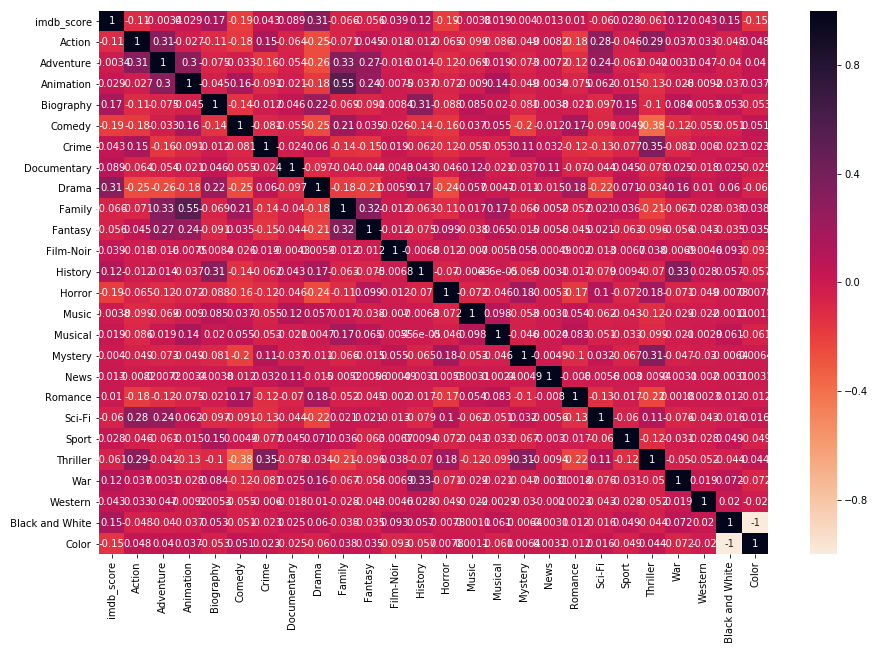

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df8.corr(),annot=True,cmap=sns.cm.rocket_r)

<b>Mapeando os valores de imdb_score para valores inteiros, para utilização no modelo</b>

In [109]:
target = df8['imdb_score']
target.head()
def make_target_frame(frame, target_column):
    df_mod = frame.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["imdb_score"] = df_mod[target_column].map(map_to_int)
    return (df_mod, targets)
dff, targets = make_target_frame(df8, "imdb_score")
dff2 =  dff.drop(['imdb_score'], axis=1)



<b>Seleção das das features mais importantes para serem aplicadas ao modelo, levando em consideração apenas os generos</b>

In [111]:
clf = ExtraTreesClassifier()
clf.fit(dff2, dff['imdb_score'])
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(dff2)
X_new.shape

(4581, 11)

<b>Seleção das features levando em consideração apenas as colunas dummies de `content_rating`</b>

In [123]:
df9 = df6.drop(['actor_3_name','plot_keywords','movie_imdb_link','num_user_for_reviews','language','country','movie_facebook_likes','director_name','num_critic_for_reviews','duration','actor_2_name','actor_1_name','movie_title','num_voted_users','Action','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Film-Noir','History','Horror','Music','Musical','Mystery','News','Romance','Sci-Fi','Sport','Thriller','War','Western','Color'], axis=1)
dff9 , targets = make_target_frame(df9,"imdb_score")

x = dff9.drop(['imdb_score'], axis=1)

clf2 = ExtraTreesClassifier()
clf2.fit(x, dff9['imdb_score'])

model = SelectFromModel(clf2, prefit=True)
X_new = model.transform(x)

X_new.shape

(4581, 8)